<a href="https://colab.research.google.com/github/gitorivera/eeg-project/blob/main/LSTM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 0s 19ms/step


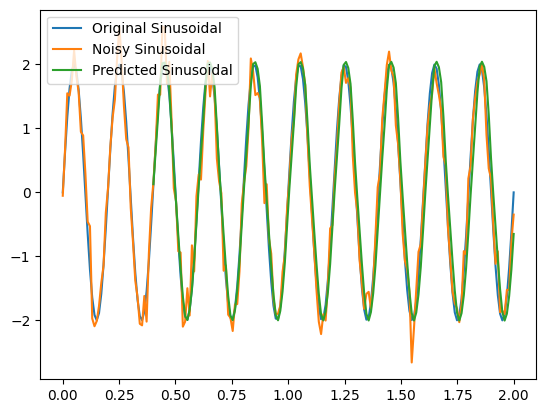

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Parámetros
fs = 100  # Frecuencia de muestreo (Hz)
t = 2  # Duración de la señal (s)
f_sin = 5  # Frecuencia de la señal sinusoidal (Hz)
noise_std = 0.5  # Desviación estándar del ruido gaussiano

# Generar la señal sinusoidal con ruido
t_points = np.linspace(0, t, t * fs)
sin_wave = 2*np.sin(2 * np.pi * f_sin * t_points)
noise = np.random.normal(0, noise_std, size=len(t_points))
noisy_sin_wave = sin_wave + 0.5*noise

# Preparar datos para la red LSTM
def prepare_data(signal, sequence_length):
    x = []
    y = []
    for i in range(len(signal) - sequence_length):
        x.append(signal[i:i + sequence_length])
        y.append(signal[i + sequence_length])
    return np.array(x), np.array(y)

sequence_length = 40
x_train, y_train = prepare_data(noisy_sin_wave[:-1], sequence_length)
x_train = np.expand_dims(x_train, axis=-1)

# Construir la red LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar la red LSTM
model.fit(x_train, y_train, epochs=200, batch_size=16, verbose=0)

# Predecir la señal sinusoidal sin ruido
predicted_signal = []
current_sequence = noisy_sin_wave[:sequence_length]
while len(predicted_signal) < len(noisy_sin_wave) - sequence_length:
    predicted_value = model.predict(current_sequence.reshape(1, sequence_length, 1))
    predicted_signal.append(predicted_value[0, 0])
    current_sequence = np.roll(current_sequence, -1)
    current_sequence[-1] = predicted_value

# Graficar las señales
plt.figure()
plt.plot(t_points, sin_wave, label='Original Sinusoidal', linestyle='-')
plt.plot(t_points, noisy_sin_wave, label='Noisy Sinusoidal')
plt.plot(t_points[sequence_length:], predicted_signal, label='Predicted Sinusoidal')
plt.legend()
plt.show()
